In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [18]:
def convert_target(point):
    rho = point[0]
    r = point[1]
    z = point[2]

    x = r * np.cos(rho)
    y = r * np.sin(rho)

    return [-x, y, z]

In [19]:
steps = 6

In [20]:
exp_r = np.flip(np.linspace(0,0.78,steps))
exp_r

array([0.78 , 0.624, 0.468, 0.312, 0.156, 0.   ])

In [21]:
exp_z = np.linspace(0.25, 0.6,steps)
exp_z

array([0.25, 0.32, 0.39, 0.46, 0.53, 0.6 ])

In [22]:
n_points = np.linspace(40,1,steps).astype(int)

In [23]:
test_points = []

for i,r in enumerate(exp_r):
    r = np.full(n_points[i],exp_r[i])
    for j,z in enumerate(exp_z):
        rho = np.linspace(-np.pi,np.pi,n_points[i])
        z = np.full(n_points[i],exp_z[j])
        points = np.hstack((rho.reshape(-1,1),r.reshape(-1,1),z.reshape(-1,1)))
        tmp_points = np.apply_along_axis(convert_target, 1, points)
        for p in tmp_points:
            test_points.append(p)

In [24]:
test_points = np.array(test_points)

In [25]:
test_points = np.unique(test_points, axis=0)
test_points.shape

(726, 3)

In [26]:
np.savetxt(os.path.join("..","src","test_points.txt"),test_points)

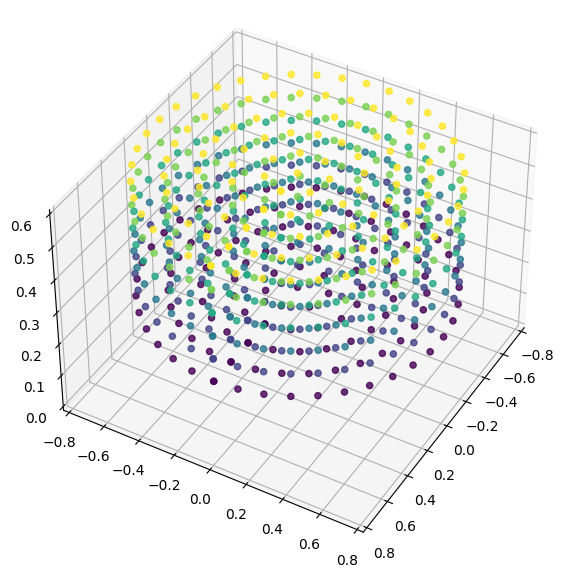

In [27]:
fig = fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-.8,.8)
ax.set_ylim(-.8,.8)
ax.set_zlim(0,.6)
ax.view_init(azim=30,elev=40)
ax.scatter(test_points[:,0],test_points[:,1],test_points[:,2],c=test_points[:,2], alpha=0.8, label="targetCoM test")